In [1]:
!pip install pygal

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygal  
import plotly.express as px
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


تحميل البيانات 

In [3]:

df=pd.read_csv("exams.csv")


In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,free/reduced,completed,74,64,69
1,female,group A,some college,standard,none,65,63,66
2,male,group D,some high school,free/reduced,completed,69,65,66
3,male,group B,associate's degree,free/reduced,completed,68,63,65
4,male,group D,some college,free/reduced,none,61,60,55
...,...,...,...,...,...,...,...,...
995,female,group B,master's degree,standard,none,71,85,81
996,female,group E,associate's degree,standard,none,99,100,98
997,male,group C,some college,free/reduced,completed,58,71,67
998,male,group B,associate's degree,standard,none,68,56,62


إستكشاف البيانات 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,free/reduced,completed,74,64,69
1,female,group A,some college,standard,none,65,63,66
2,male,group D,some high school,free/reduced,completed,69,65,66
3,male,group B,associate's degree,free/reduced,completed,68,63,65
4,male,group D,some college,free/reduced,none,61,60,55
...,...,...,...,...,...,...,...,...
995,female,group B,master's degree,standard,none,71,85,81
996,female,group E,associate's degree,standard,none,99,100,98
997,male,group C,some college,free/reduced,completed,58,71,67
998,male,group B,associate's degree,standard,none,68,56,62


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.464000,69.953000,68.888000
std,14.815337,14.562034,15.163027
min,25.000000,23.000000,20.000000
25%,58.000000,60.000000,58.000000
50%,68.000000,70.000000,68.500000
75%,78.000000,81.000000,80.000000
max,100.000000,100.000000,100.000000


In [9]:
by_race_ethnicity= df.groupby(["race/ethnicity"])[["math score","reading score","writing score"]].mean().round(2).reset_index()
groupCM=by_race_ethnicity['math score'].loc[(by_race_ethnicity['race/ethnicity']== "group C")]
groupBM=by_race_ethnicity['math score'].loc[(by_race_ethnicity['race/ethnicity']== "group B")]


C:\Users\amalw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

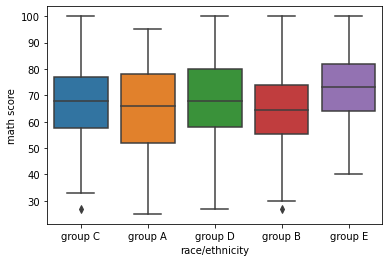

In [10]:
sns.boxplot('race/ethnicity', 'math score', data=df)

In [11]:
df['math score'].loc[(df['math score']<35) & (df['race/ethnicity']== "group C")]=round(groupCM)
df['math score'].loc[(df['math score']<35) & (df['race/ethnicity']== "group B")]=round(groupBM)


C:\Users\amalw\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\amalw\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\amalw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

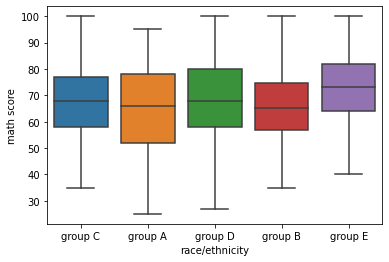

In [12]:
sns.boxplot('race/ethnicity', 'math score', data=df)

C:\Users\amalw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race/ethnicity', ylabel='reading score'>

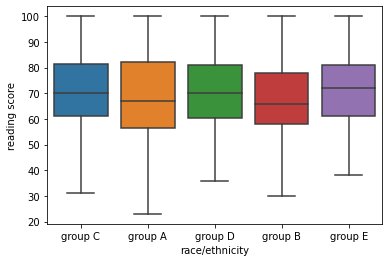

In [13]:
sns.boxplot('race/ethnicity', 'reading score', data=df)

C:\Users\amalw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

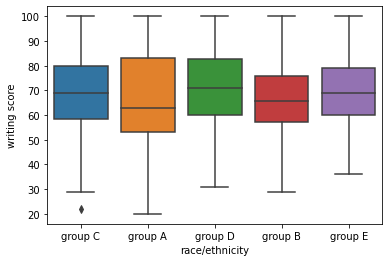

In [14]:
sns.boxplot('race/ethnicity', 'writing score', data=df)

In [15]:
groupCMW=by_race_ethnicity['writing score'].loc[(by_race_ethnicity['race/ethnicity']== "group C")]
df['writing score'].loc[(df['writing score']<30) & (df['race/ethnicity']== "group C")]=round(groupCMW)


C:\Users\amalw\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\amalw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

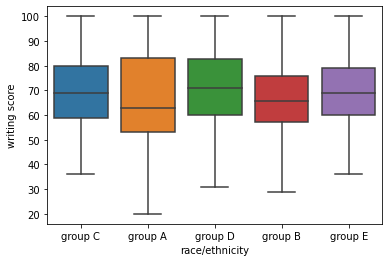

In [16]:
sns.boxplot('race/ethnicity', 'writing score',data=df)

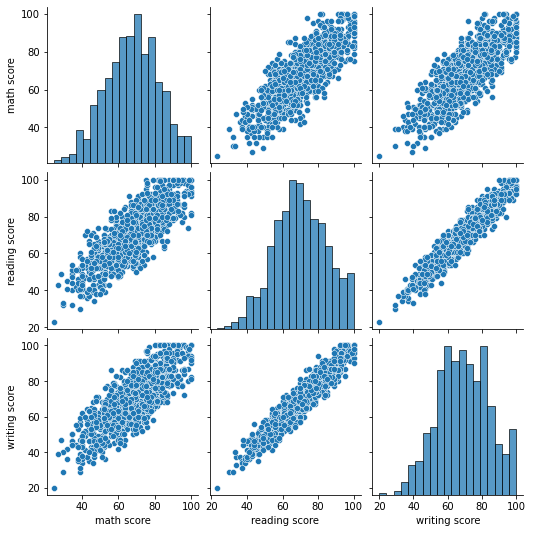

In [17]:
sns.pairplot(df)


<AxesSubplot:>

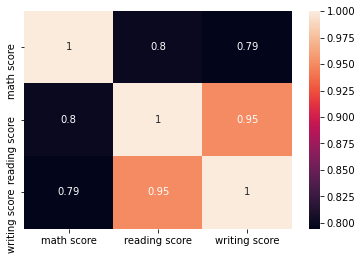

In [18]:
sns.heatmap(df.corr(), annot=True)


In [19]:
df["test preparation course"].unique()

array(['completed', 'none'], dtype=object)

In [20]:
df["parental level of education"].unique()

array(['some high school', 'some college', "associate's degree",
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

In [21]:
df["lunch"].unique()

array(['free/reduced', 'standard'], dtype=object)

In [22]:
df["gender"].unique()


array(['male', 'female'], dtype=object)

In [23]:
df["race/ethnicity"].unique()

array(['group C', 'group A', 'group D', 'group B', 'group E'],
      dtype=object)

In [24]:
df=df.replace(['group A', 'group B','group C','group D','group E'], [0,1,2,3,4])

In [25]:
df=df.replace(['male', 'female'], [0,1])

In [26]:
df=df.replace(['free/reduced', 'standard'], [0,1])

In [27]:
df=df.replace(['completed', 'none'], [0,1])

In [28]:
df=df.replace(['some high school', 'some college', "associate's degree",
       "bachelor's degree", "master's degree", 'high school'], [0,1,2,3,4,5])

In [29]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,0,0,0,74.0,64,69.0
1,1,0,1,1,1,65.0,63,66.0
2,0,3,0,0,0,69.0,65,66.0
3,0,1,2,0,0,68.0,63,65.0
4,0,3,1,0,1,61.0,60,55.0
...,...,...,...,...,...,...,...,...
995,1,1,4,1,1,71.0,85,81.0
996,1,4,2,1,1,99.0,100,98.0
997,0,2,1,0,0,58.0,71,67.0
998,0,1,2,1,1,68.0,56,62.0


In [30]:
np.isnan(df).sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     7
reading score                  0
writing score                  2
dtype: int64

In [31]:
df=df.dropna()


In [32]:
X = df.iloc[:, :5].values
y = df.iloc[:,-3:].values

In [33]:
X.shape

(992, 5)

In [34]:
y.shape

(992, 3)

In [35]:
y

array([[74., 64., 69.],
       [65., 63., 66.],
       [69., 65., 66.],
       ...,
       [58., 71., 67.],
       [68., 56., 62.],
       [69., 66., 73.]])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)


In [ ]:
Accuracy(y_test,y_pred)